# Recurrent Neural Networks - tutorial

**Goal:** Understanding the basic functionality of a RNN

**Why:** Recurrent Neural Networks (RNNs) were the first neural network architecture designed to incorporate a "memory" mechanism—something traditional feedforward networks lack. This memory aspect is crucial for modeling and predicting sequential data, where order plays a fundamental role, such as in temperature time series or text generation.

While more advanced architectures like LSTMs and Transformers have since been developed to overcome RNNs' limitations, understanding RNNs is essential. They serve as a foundation for grasping key challenges in machine learning, such as the vanishing gradient problem, and how later architectures like LSTMs and Transformers address these issues. Even though RNNs are rarely used in practice today, studying them provides valuable insight into the evolution of sequence modeling techniques.

**How:** We will build a basic RNN building block and try to predict a simple time series. We will approach this in a similar way of the excellent statsquest video and encourage you to first watch it before diving into the code

[Statsquest - Recurrent Neuraal Networks clearly explained](https://www.youtube.com/watch?v=AsNTP8Kwu80&t=321s)

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf


## 1. The time series

Suppose the erudite Data Scientist of your company discovered after a long and complicated study that the time series we are trying to predict has following characteristics:
<BR/>


<img src="https://raw.githubusercontent.com/tribp/Forecasting/main/images/ts_patterns.png" alt="Image of patterns" width="800px" /> <BR/>

**Goal:** Create a model to forecast this time series with one single RNN unit

<img src="https://raw.githubusercontent.com/tribp/Forecasting/main/images/ts_plot.png" alt="Image of patterns" width="600px" />






## We model the data patterns:


If we see Xt-1 and Xt then we see mostly Xt+1:
*   Pattern 1 = 0 , 0    -> predict 0
*   Pattern 2 = 0 , 0.5  -> predict 1
*   Pattern 3 = 1 , 1    -> predict 1
*   Pattern 4 = 1 , 0.5  -> predict 0

So we have sequences of the time series of 2 timesteps and will predict 1 timesteps into the future.

In order to make the data handling easier, we first put them together and create numpy arrays of 3 elements: t-1, t plus the target t+1. This allows to easily split the data into X (the input sequence), the 2 first elements and y (the target), the last element



In [13]:
# Creating the Data that holds the 4 patterns
my_data = [ [0,0,0],
            [0,0.5,1],
            [1,1,1],
            [1,0.5,0]]
data = np.array(my_data)

In [14]:
# Train - split
X = data[:,:2]
y = data[:,-1:]

In [15]:
print(X)
print(y)

[[0.  0. ]
 [0.  0.5]
 [1.  1. ]
 [1.  0.5]]
[[0.]
 [1.]
 [1.]
 [0.]]


## Creating the RNN

### The Statsquest RNN model

**Remark:** The RNN architecture is typically drawn in "folded" or "unfolded" form. The folded fom is a more abstract version and the unfolded is easier to understand what happens with consequtive values in a time series. The first (oldest) value of a sequence is the input for the upper input and de second (second oldest) is the input for the second highest input and so on. Remember that this is only 1 RNN cell and that **ALL** the weights are identical for all calculations in the forward pass. The unfolding is just a matter of presentation.


**RNN unfolded architecture**<BR/>
<img src="https://raw.githubusercontent.com/tribp/Forecasting/main/images/statsquest_RNN_folded.png" alt="RNN model picture" width="500px">

**RNN folded architecture**<BR/>
<img src="https://raw.githubusercontent.com/tribp/Forecasting/main/images/statsquest_RNN_unfolded.png" alt="RNN model picture" width="500px">

**RNN in tensorflow:**<BR/>

The basic RNN architecture and the statsquest RNN are not identical!!!<BR/>
The tensoflow **"SimpleRNN"** is only the first part and holds: w1,b1 and w2.

In order to create a model in tensorflow that exactly copies the statsquest model we have to add a **Dense** layer with one node. This wil model the w3 and b3

<img src="https://raw.githubusercontent.com/tribp/Forecasting/main/images/tensorflow_RNN.png" alt="RNN model picture" width="500px">

**Remark:** In the code below we wil use the more common naming that is ussed for RNN's: input, hidden en output. The bias term can be placed before or after the activation function.



*   input:  w1 -> w_in
*   hidden: w2, b2  -> w_h, b_h
*   output: w3, b3  -> w_out, b_out

The input layer will gets sequences like [0,0.5]
*   time steps = 2
*   features =1

**Conclusion:** input shape = (2,1)





In [24]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense

# Model identical as in Statsquest video
model  = tf.keras.models.Sequential([
    Input(shape = (2,1), name = "Input_Layer"),
    SimpleRNN(units=1, activation = "tanh", name="Simple_RNN"),
    Dense(1, name = "Output_Layer")
    ])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Simple_RNN (SimpleRNN)               │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Define learning rate, optimizer and loss function to optimize
lr = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = lr, loss= 'mae')

In [26]:
model.fit(X, y, epochs=500, verbose=True)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.1280
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 1.1149
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1.1017
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 1.0883
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.0750
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.0615
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 1.0479
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.0343
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.0207
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.0069
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.9930
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.9790
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.9649
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.9507
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.9362
Epoch 16/500
1/1 ━━━

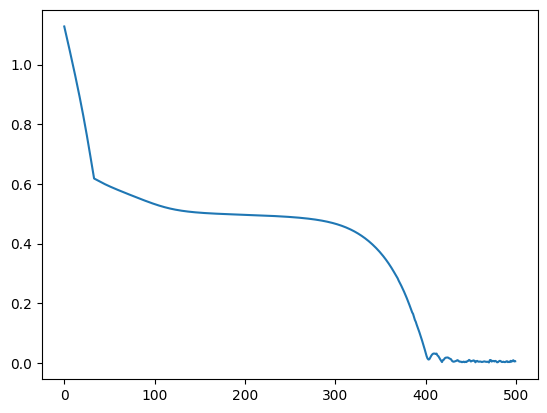

In [27]:
# plot loss
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])
plt.show()

In [28]:
# Get the layer weights and biases (in array format)
w_in, w_h, b_h = model.layers[0].get_weights()
w_out, b_out = model.layers[1].get_weights()

# Print the weight/bias values
print(f"Input w_in: {w_in.item():.2f}")
print(f"Input w_h: {w_h.item():.2f}")
print(f"Input b_h: {b_h.item():.2f}")
print(f"Output w_out: {w_out.item():.2f}")
print(f"Output b_out: {b_out.item():.2f}")





Input w_in: 1.49
Input w_h: -0.60
Input b_h: -0.58
Output w_out: 1.43
Output b_out: 0.37


## Test our patterns to check the expect outcome

In [29]:
forecast_0_0 = model.predict(np.array([[0,0]]))
forecast_0_05 = model.predict(np.array([[0,0.5]]))
forecast_1_1 = model.predict(np.array([[1,1]]))
forecast_1_05 = model.predict(np.array([[1,0.5]]))
print(f'Forecast 0,0: {forecast_0_0}')
print(f'Forecast 0,05: {forecast_0_05}')
print(f'Forecast 1,1: {forecast_1_1}')
print(f'Forecast 1,05: {forecast_1_05}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Forecast 0,0: [[-0.00415608]]
Forecast 0,05: [[1.0001612]]
Forecast 1,1: [[0.994486]]
Forecast 1,05: [[-0.01071885]]


# Example: We now will create a "random" time series that follows mostly our patterns

In [11]:
!pwd /content/drive/MyDrive/Colab Notebooks/ML/datasets/RNN/RNN_simple.xlsx

/content


In [31]:
filepath = '/content/drive/MyDrive/Colab Notebooks/ML/datasets/RNN/RNN_simple.xlsx'
df = pd.read_excel(filepath, sheet_name='RNN_data', usecols="B", skiprows=4, nrows=26)
df.head()

,Radiation
0,0.0
1,0.5
2,1.0
3,0.5
4,0.0


<Axes: >

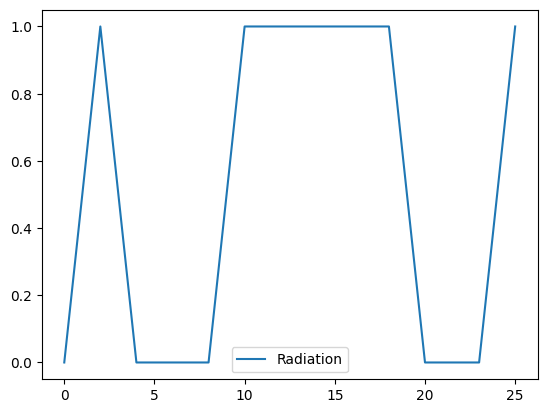

In [32]:
df.plot()

In [33]:
# Creating sequences
n_steps_in = 2
n_steps_out = 1

# We convert to numpy
data = df['Radiation'].values

# Sequences
sequences = np.array([data[i:i+n_steps_in+n_steps_out] for i in range(len(df)-n_steps_in-n_steps_out+1)  ])

print(f'Sesuences count : {len(sequences)}')
print(f'First seq: {sequences[0]}')
print(f'Last se: {sequences[-1]}')

Sesuences count : 24
First seq: [0.  0.5 1. ]
Last se: [0.  0.5 1. ]


## Split in X en y

In [34]:
X = sequences[:,:-1]
y = sequences[:,-1:]

## Predict

In [35]:
# Forecast
forecast = model.predict(X)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


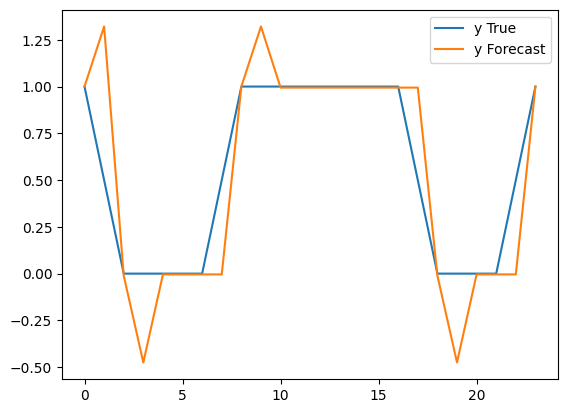

In [36]:
import matplotlib.pyplot as plt
plt.plot(y, label='y True')
plt.plot(forecast, label='y Forecast')
plt.legend()
plt.show()

## Check versus Statsquest weights

### We load the statsweights into our model

In [37]:
from os import stat
# Define new custom weights - according stasquest video
stats_w_in = 1.8
stats_w_h = -0.5
stats_b_h = 0.0
stats_w_out = 1.1
stats_b_out = 0.0

# convert to appropriate numpy format
stats_w_in = np.array([[stats_w_in]])
stats_w_h = np.array([[stats_w_h]])
stats_b_h = np.array([stats_b_h])
stats_w_out = np.array([[stats_w_out]])
stats_b_out = np.array([stats_b_out])


# Set new weights to the RNN layer
model.layers[0].set_weights([stats_w_in, stats_w_h, stats_b_h])
# Set new weights to the Dense output layer
model.layers[1].set_weights([stats_w_out, stats_b_out])

## Predict and plot

In [38]:
# Forecast
forecast_statsquest = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


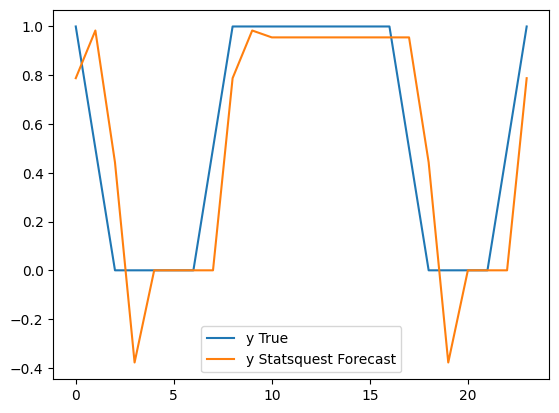

In [39]:
import matplotlib.pyplot as plt
plt.plot(y, label='y True')
plt.plot(forecast_statsquest, label='y Statsquest Forecast')
plt.legend()
plt.show()

## Final Conclusion

We see that we even get better results than the statsquest model. But this is probably due to the fact that they used 1 decimal digits for the weights to simplify the math. And remember that the main goal was to explain the inner mechanics of a RNN what they did brilliantly!

In [41]:
from sklearn.metrics import mean_absolute_error
mae_statsquest = mean_absolute_error(y, forecast_statsquest)
mae_model = mean_absolute_error(y, forecast)

print(f'MAE Statsquest: {mae_statsquest:.3f}')
print(f'MAE Model: {mae_model:.3f}')

MAE Statsquest: 0.189
MAE Model: 0.153
